In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playing-the-stock-market-is-a-fools-game/sample_submission.csv
/kaggle/input/playing-the-stock-market-is-a-fools-game/train.csv
/kaggle/input/sympy-1-13-3/sympy-1.13.3-py3-none-any.whl
/kaggle/input/captum/captum-0.7.0-py3-none-any.whl


**Python Environment and Base Dependencies**

Introducing a range of commonly used libraries

1. Overview of library functions

NumPy: Provides multi-dimensional array objects and various numerical calculation functions

OS : Provides the ability to interact with the operating system

PyTorch(torch、torch.nn、torch.nn.functional、torch.optim):
torch: provides core functionality such as tensor operations, auto-differentiation, etc.

torch.nn: encapsulates commonly used neural network layers and model components.

torch.nn.functional: provides the functional API corresponding to the torch.nn module.

torch.optim: provides commonly used optimisation algorithms, such as SGD, Adam and so on.
    
Matplotlib: Commonly used drawing libraries

Seaborn: Commonly used for statistical data visualisation

Pandas: Commonly used for data processing and analysis

2. GPU device settings

A simple use_cuda switch with system detection ensures that the GPU is used for acceleration when the environment allows it.

In [2]:
%matplotlib inline

# Common imports
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
use_cuda = False
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

**Data reading and visualisation configuration**
1. Overview of library features

dateutil.parser (parse): Provides date parsing functionality, converting dates in string format to datetime objects for subsequent time series analysis.

Matplotlib (matplotlib, matplotlib.pyplot): one of the most commonly used plotting libraries in Python, can be used to generate various types of charts.

Seaborn (sns): Simplifies the plotting code and provides better looking default styles.

NumPy (np): Provides multi-dimensional array objects and common numerical computation methods.

Pandas (pd): mainly used for data processing and analysis.

2. Visual configuration

figure.figsize: control the size of the drawing window.

figure.dpi: control the drawing resolution, the higher the value the clearer the image.

3. Data reading

pd.read_csv(): read CSV format data from the specified path and convert it to DataFrame of Pandas.

df.head(): view the first five rows of data, a quick understanding of the data structure and field distribution.

In [3]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

df = pd.read_csv('/kaggle/input/playing-the-stock-market-is-a-fools-game/train.csv')
df.head()


,ID,05/04/2010,06/04/2010,07/04/2010,08/04/2010,09/04/2010,12/04/2010,13/04/2010,14/04/2010,15/04/2010,...,18/03/2022,21/03/2022,22/03/2022,23/03/2022,24/03/2022,25/03/2022,28/03/2022,29/03/2022,30/03/2022,31/03/2022
0,company_0,1.30,0.19,0.46,-0.23,1.20,-0.26,-0.34,1.64,1.21,...,-0.36,0.05,0.30,-3.10,0.04,0.86,0.31,0.95,0.68,-0.52
1,company_1,-0.83,0.62,-2.74,6.33,1.32,4.52,0.05,3.94,5.01,...,2.20,-3.67,3.20,-1.61,2.92,0.93,1.55,3.96,0.41,1.08
2,company_2,-0.02,0.13,-0.70,0.23,1.50,-0.23,1.35,2.26,0.37,...,-0.16,-0.74,2.52,-2.06,1.57,0.10,0.90,3.05,-1.24,-1.26
3,company_3,-1.10,-0.73,-2.98,1.98,3.00,1.01,3.60,4.30,1.05,...,2.47,-2.41,1.10,-4.08,2.09,2.02,2.74,2.33,0.80,-0.91
4,company_4,2.23,-1.45,-1.74,-1.13,0.80,1.29,0.62,3.06,-0.73,...,1.28,-1.96,0.19,-2.28,-1.13,-1.53,-0.64,2.32,-1.64,-4.58


In [4]:
df.set_index('ID', inplace=True)
df = df.T
df.index = pd.to_datetime(df.index, format="%d/%m/%Y") 
df.reset_index(inplace=True)
df.rename(columns={'index': 'date'}, inplace=True)

df.head()

ID,date,company_0,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,...,company_432,company_433,company_434,company_435,company_436,company_437,company_438,company_439,company_440,company_441
0,2010-04-05,1.30,-0.83,-0.02,-1.10,2.23,0.99,2.05,2.32,1.02,...,1.16,1.70,0.52,0.21,1.34,-2.22,2.29,1.51,-2.45,0.00
1,2010-04-06,0.19,0.62,0.13,-0.73,-1.45,0.47,-1.08,-0.24,0.49,...,0.21,2.51,0.05,-0.25,0.18,-0.84,-0.26,0.94,-3.75,0.98
2,2010-04-07,0.46,-2.74,-0.70,-2.98,-1.74,-0.59,-1.00,-0.67,-1.97,...,-0.65,-2.14,0.62,-0.71,-0.42,-1.55,0.75,0.12,0.24,-1.38
3,2010-04-08,-0.23,6.33,0.23,1.98,-1.13,-0.05,0.14,-0.12,-0.25,...,-0.42,0.99,-0.46,0.58,-0.42,1.47,-1.31,0.80,2.71,-0.61
4,2010-04-09,1.20,1.32,1.50,3.00,0.80,2.10,1.99,1.70,0.99,...,1.83,2.28,0.21,2.17,0.86,0.42,1.04,0.80,0.75,-0.07


**Time series data preprocessing and dataset construction**

1. Data scaling

Use MinMaxScaler to normalise multi-column features to prevent scale differences from affecting model training.

2. Custom Dataset

TimeSeriesDataset divides the time series into (x, y) pairs, where x is the length of the window_size and y is the target at the next moment.

3. Divide the training/validation set

According to train_ratio, divide the data into training set and validation set, and create TimeSeriesDataset instances respectively.

4. Data Loader

Use DataLoader (e.g. batch_size=32) to read data in batch for subsequent model training.



In [5]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
import optuna

scaler = MinMaxScaler()
scaler.fit(df.iloc[:, 1:].values)

df_scaled = scaler.transform(df.iloc[:, 1:].values)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[1:], index=df['date'])

class TimeSeriesDataset(Dataset):
    def __init__(self, data, window_size):
        self.data = data
        self.window_size = window_size

    def __len__(self):
        return len(self.data) - self.window_size

    def __getitem__(self, index):
        x = self.data[index:index+self.window_size, :]
        y = self.data[index+self.window_size, :]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
window_size = 60
train_ratio = 0.8

split_idx = int(len(df_scaled) * train_ratio)
train_data = df_scaled.iloc[:split_idx].values 
val_data = df_scaled.iloc[split_idx:].values

train_dataset = TimeSeriesDataset(train_data, window_size)
val_dataset = TimeSeriesDataset(val_data, window_size)

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

**Data loaders function get_data_loaders**

1. Define functions

Encapsulate the data loading process and unify the handling of slicing, building datasets and loaders.

2. Split training/validation set

Slices the data proportionally into training and validation sets based on train_ratio.

3. Build Dataset

Pack the sliced data into sliding window (x, y) using TimeSeriesDataset.

4. Create DataLoader

Use the DataLoader to batch read the data:

Training Set setting shuffle=True

Validation set shuffle=False

In [6]:
def get_data_loaders(df_scaled, window_size=60, batch_size=32, train_ratio=0.8):

    data_values = df_scaled.values if hasattr(df_scaled, 'values') else df_scaled

    split_idx = int(len(data_values) * train_ratio)
    train_data = data_values[:split_idx]
    val_data   = data_values[split_idx:]

    train_dataset = TimeSeriesDataset(train_data, window_size)
    val_dataset   = TimeSeriesDataset(val_data, window_size)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader

**Constructing LSTM time series prediction models**

1. Defining the model structure

Define the LSTM model using PyTorch, encapsulated and returned in the create_model function.


2. LSTM network

Construct the time series processing layer using nn.LSTM:

input_dim: input feature dimension

latent_dim: dimension of hidden states

num_layers: number of LSTM stacked layers

dropout: dropout between layers (default 0)
    
3. Fully connected output layer

Construct the output layer using nn.Sequential:

Includes ReLU activation

Linear layer maps hidden states into output_dim dimensions

4. Forward propagation logic

Take the output of the last time step of the LSTM as the feature

Input the fully connected layer to get the final prediction



In [7]:
def create_model(input_dim, latent_dim, output_dim, num_layers,dropout=0.0):
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.input_dim  = input_dim 
            self.hidden_dim = latent_dim
            self.num_layers = num_layers
            self.lstm   = nn.LSTM(input_dim, latent_dim, num_layers, batch_first=True, dropout=dropout)
            # self.linear = nn.Linear(latent_dim, output_dim) 
            self.linear = nn.Sequential(
                nn.ReLU(), 
                nn.Linear(latent_dim, output_dim)
)
        def forward(self, x):
            y, _ = self.lstm(x)
            y = self.linear(y[:, -1, :]) 
            return y 

    return Net()

**LSTM hyperparameter optimisation using Optuna**

1. Import libraries

Introduces optuna for hyperparameter search and torch for model construction and training.

2. Define the optimisation objective function

Used by optuna to perform multiple trials to automatically find the optimal combination of hyperparameters.

Returns the validation set loss val_loss as an evaluation metric.

3. Hyperparametric search space

Use trial.suggest_ to define the search scope:

optimizer: optimiser type (SGD, Adam, AdamW, RMSprop)

atent_dim: LSTM latent dimensions (16 ~ 128)

num_layers: number of LSTM layers (1 ~ 3)

lr: learning rate (logarithmic sampling, 1e-4 ~ 5e-4)

window_size: time window size (30 ~ 60)

dropout: dropout ratio (0 ~ 0.5)

4. Model and optimiser creation

Construct a model based on the hyperparameters of the current experiment and select the corresponding optimiser:

5. Data loading and training

Construct training/validation set using current window_size

Train the model, evaluate and return the validation set loss


In [8]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim

def objective(trial):
    optimizer_name = trial.suggest_categorical("optimizer", ["SGD", "RMSprop", "AdamW", "Adam"])
    
    latent_dim = trial.suggest_int("latent_dim", 16, 128)  
    num_layers = trial.suggest_int("num_layers", 1, 3)  
    lr = trial.suggest_float("lr", 1e-4, 5e-4, log=True) 
    window_size = trial.suggest_int("window_size", 30, 60)
    dropout = trial.suggest_float("dropout", 0.0, 0.5)
    train_loader, val_loader = get_data_loaders(df_scaled, window_size=window_size, batch_size=32, train_ratio=0.8)

    model = create_model(input_dim=num_features, latent_dim=latent_dim, 
                         output_dim=num_features, num_layers=num_layers)
    model = model.to(device)

    if optimizer_name == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    elif optimizer_name == "RMSprop":
        optimizer = optim.RMSprop(model.parameters(), lr=lr)
    elif optimizer_name == "AdamW":
        optimizer = optim.AdamW(model.parameters(), lr=lr)
    elif optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=lr)
  
    # train_loader, val_loader = get_data_loaders(window_size) 
    # val_loss = train_model_on_sequences(model, train_loader, val_loader, optimizer, epochs=10)
    val_loss = train_model_on_sequences(model, train_loader, val_loader, optimizer, epochs=30)

    return val_loss  

**Training the LSTM model**

1. Define the training function

train_model_on_sequences is used to train the LSTM model and return the average loss of the validation set.

2. loss function and optimiser

MSELoss is used as the loss function for the regression task.

The optimiser is passed in externally and can be switched flexibly.

3. Training process

Migrate the model and data to the device (GPU or CPU).

Cyclic epochs rounds of training

Perform forward propagation, backpropagation, and parameter updates in each round

4. Validation and early stopping mechanism

Evaluate performance on the validation set after each round of training.

Record the optimal result using best_val_loss

Early Stopping is triggered if there is no improvement in the validation loss for consecutive patience times

5. Print the log

Output the training and validation loss every 5 rounds to observe the convergence of the model:


In [9]:
def train_model_on_sequences(model, train_loader, val_loader, optimizer ,epochs=50):
    criterion = nn.MSELoss()
    # optimizer = optim.Adam(model.parameters(), lr=lr)
    best_val_loss = float("inf")
    patience = 15 
    patience_counter = 0
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)
        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)

                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)
                val_loss += loss.item()
        if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping")
                break       
        if (epoch+1) % 5 == 0:
            print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")    
    # print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")
    return val_loss / len(val_loader)
    
    print("Training complete.")
    

**Hyperparameter optimisation with Optuna**
1. Setting the characterisation dimensions

Get the number of features of the df_scaled data as input dimensions to the model.

3. create Optuna study object

direction=‘minimize’: the goal is to minimise the validation loss (val_loss).

study is used to manage trials and record the best hyperparameter combinations.

5. run hyperparameter search

Call the objective function to run 10 rounds of search (n_trials=10).

Optuna finds the optimal solution by experimenting with different combinations of hyperparameters.

7. Output the optimal hyperparameters

After training, print the optimal hyperparameter configuration for model training.

In [17]:
num_features = df_scaled.shape[1]
study = optuna.create_study(direction="minimize") 
study.optimize(objective, n_trials=10) 
print("Optimal hyperparameters:", study.best_params)

[I 2025-03-21 23:39:17,292] A new study created in memory with name: no-name-d718300e-d6f8-412d-bd1b-f4b17c2038a1


Epoch 5/30 - Train Loss: 0.1821, Val Loss: 0.1036
Epoch 10/30 - Train Loss: 0.1821, Val Loss: 0.1037
Epoch 15/30 - Train Loss: 0.1822, Val Loss: 0.1036


[I 2025-03-21 23:40:01,884] Trial 0 finished with value: 0.005761652712761942 and parameters: {'optimizer': 'AdamW', 'latent_dim': 71, 'num_layers': 2, 'lr': 0.0002895605714777007, 'window_size': 34, 'dropout': 0.11726802708287587}. Best is trial 0 with value: 0.005761652712761942.


Early stopping
Epoch 5/30 - Train Loss: 1.8347, Val Loss: 0.3473
Epoch 10/30 - Train Loss: 0.2021, Val Loss: 0.1073
Epoch 15/30 - Train Loss: 0.1804, Val Loss: 0.1041
Epoch 20/30 - Train Loss: 0.1798, Val Loss: 0.1041
Epoch 25/30 - Train Loss: 0.1803, Val Loss: 0.1041


[I 2025-03-21 23:40:49,041] Trial 1 finished with value: 0.005785478544162793 and parameters: {'optimizer': 'AdamW', 'latent_dim': 20, 'num_layers': 3, 'lr': 0.0001812150171779531, 'window_size': 41, 'dropout': 0.28760350700904685}. Best is trial 0 with value: 0.005761652712761942.


Epoch 30/30 - Train Loss: 0.1807, Val Loss: 0.1041
Epoch 5/30 - Train Loss: 26.3571, Val Loss: 6.3742
Epoch 10/30 - Train Loss: 26.2584, Val Loss: 6.3471
Epoch 15/30 - Train Loss: 26.1519, Val Loss: 6.3202
Epoch 20/30 - Train Loss: 26.0273, Val Loss: 6.2935
Epoch 25/30 - Train Loss: 25.9150, Val Loss: 6.2669


[I 2025-03-21 23:42:00,481] Trial 2 finished with value: 0.3466973917351829 and parameters: {'optimizer': 'SGD', 'latent_dim': 47, 'num_layers': 3, 'lr': 0.00010257604097769711, 'window_size': 39, 'dropout': 0.2587136224511662}. Best is trial 0 with value: 0.005761652712761942.


Epoch 30/30 - Train Loss: 25.8093, Val Loss: 6.2406
Epoch 5/30 - Train Loss: 25.2908, Val Loss: 6.1756
Epoch 10/30 - Train Loss: 24.5542, Val Loss: 6.0015
Epoch 15/30 - Train Loss: 23.9055, Val Loss: 5.8446
Epoch 20/30 - Train Loss: 23.2446, Val Loss: 5.6833
Epoch 25/30 - Train Loss: 22.5299, Val Loss: 5.5079


[I 2025-03-21 23:42:57,557] Trial 3 finished with value: 0.2951715621683333 and parameters: {'optimizer': 'SGD', 'latent_dim': 57, 'num_layers': 1, 'lr': 0.000289958501108919, 'window_size': 57, 'dropout': 0.07139336630583676}. Best is trial 0 with value: 0.005761652712761942.


Epoch 30/30 - Train Loss: 21.7311, Val Loss: 5.3131
Epoch 5/30 - Train Loss: 0.1823, Val Loss: 0.1046
Epoch 10/30 - Train Loss: 0.1847, Val Loss: 0.1044
Epoch 15/30 - Train Loss: 0.1849, Val Loss: 0.1061


[I 2025-03-21 23:43:51,146] Trial 4 finished with value: 0.005809131401797963 and parameters: {'optimizer': 'Adam', 'latent_dim': 93, 'num_layers': 2, 'lr': 0.0004855141528088084, 'window_size': 39, 'dropout': 0.3705247185353807}. Best is trial 0 with value: 0.005761652712761942.


Early stopping
Epoch 5/30 - Train Loss: 26.4159, Val Loss: 6.3811
Epoch 10/30 - Train Loss: 26.1636, Val Loss: 6.3186
Epoch 15/30 - Train Loss: 25.9141, Val Loss: 6.2586
Epoch 20/30 - Train Loss: 25.6612, Val Loss: 6.2002
Epoch 25/30 - Train Loss: 25.4330, Val Loss: 6.1439


[I 2025-03-21 23:44:33,761] Trial 5 finished with value: 0.3382914066314697 and parameters: {'optimizer': 'SGD', 'latent_dim': 42, 'num_layers': 2, 'lr': 0.0001867264564197032, 'window_size': 33, 'dropout': 0.26852495289244854}. Best is trial 0 with value: 0.005761652712761942.


Epoch 30/30 - Train Loss: 25.1993, Val Loss: 6.0892
Epoch 5/30 - Train Loss: 26.1279, Val Loss: 6.3120
Epoch 10/30 - Train Loss: 25.7602, Val Loss: 6.2220
Epoch 15/30 - Train Loss: 25.3704, Val Loss: 6.1342
Epoch 20/30 - Train Loss: 25.0174, Val Loss: 6.0489
Epoch 25/30 - Train Loss: 24.6634, Val Loss: 5.9645


[I 2025-03-21 23:46:48,398] Trial 6 finished with value: 0.32663671175638836 and parameters: {'optimizer': 'SGD', 'latent_dim': 95, 'num_layers': 3, 'lr': 0.00029665516320796347, 'window_size': 44, 'dropout': 0.41558688747296046}. Best is trial 0 with value: 0.005761652712761942.


Epoch 30/30 - Train Loss: 24.3161, Val Loss: 5.8795
Epoch 5/30 - Train Loss: 0.1790, Val Loss: 0.1068
Epoch 10/30 - Train Loss: 0.1795, Val Loss: 0.1069
Epoch 15/30 - Train Loss: 0.1794, Val Loss: 0.1057
Epoch 20/30 - Train Loss: 0.1794, Val Loss: 0.1055
Epoch 25/30 - Train Loss: 0.1797, Val Loss: 0.1053


[I 2025-03-21 23:48:21,867] Trial 7 finished with value: 0.005889734305027459 and parameters: {'optimizer': 'Adam', 'latent_dim': 100, 'num_layers': 1, 'lr': 0.00033109552793152684, 'window_size': 59, 'dropout': 0.2124887783621156}. Best is trial 0 with value: 0.005761652712761942.


Epoch 30/30 - Train Loss: 0.1798, Val Loss: 0.1060
Epoch 5/30 - Train Loss: 0.1798, Val Loss: 0.1046
Epoch 10/30 - Train Loss: 0.1822, Val Loss: 0.1069
Epoch 15/30 - Train Loss: 0.1815, Val Loss: 0.1059


[I 2025-03-21 23:49:28,602] Trial 8 finished with value: 0.005832861585076898 and parameters: {'optimizer': 'RMSprop', 'latent_dim': 97, 'num_layers': 2, 'lr': 0.000195605416953233, 'window_size': 53, 'dropout': 0.10353957944258202}. Best is trial 0 with value: 0.005761652712761942.


Early stopping
Epoch 5/30 - Train Loss: 26.3714, Val Loss: 6.3698
Epoch 10/30 - Train Loss: 26.1216, Val Loss: 6.3108
Epoch 15/30 - Train Loss: 25.8890, Val Loss: 6.2530
Epoch 20/30 - Train Loss: 25.6340, Val Loss: 6.1956
Epoch 25/30 - Train Loss: 25.3990, Val Loss: 6.1384


[I 2025-03-21 23:50:58,772] Trial 9 finished with value: 0.33785206576188404 and parameters: {'optimizer': 'SGD', 'latent_dim': 74, 'num_layers': 3, 'lr': 0.00021512383888401516, 'window_size': 38, 'dropout': 0.4779395951823077}. Best is trial 0 with value: 0.005761652712761942.


Epoch 30/30 - Train Loss: 25.1695, Val Loss: 6.0813
Optimal hyperparameters: {'optimizer': 'AdamW', 'latent_dim': 71, 'num_layers': 2, 'lr': 0.0002895605714777007, 'window_size': 34, 'dropout': 0.11726802708287587}


**LSTM time series prediction function**

1. Prediction function predict_sequence

This function is used to predict the future time step based on the LSTM model, and supports the rolling window method to generate the sequence.

2. Enter prediction mode

Setting the model to evaluation mode

3. Pre-processing of initial inputs

Convert initial frames to PyTorch tensors and add batch dimensions to fit the model input format.

4. Progressive projection of future values

Step-by-step predicts num_steps future points in time and stores the predicted values.

5. Scrolling window update

The oldest frames are removed and new predictions are added to the input sequence to form a scrolling window.

6. Return of projections

Converts predictions into NumPy arrays to be returned for subsequent analysis or visualisation.

In [10]:
def predict_sequence(model, initial_frames, num_steps=1):
    model.eval()
    preds = []
    last_frames = torch.tensor(initial_frames, dtype=torch.float32).unsqueeze(0)

    with torch.no_grad():
        for _ in range(num_steps):
            pred = model(last_frames) 
            preds.append(pred.item())
            last_frames = torch.cat([last_frames[:, 1:, :], pred.unsqueeze(0)], dim=1)

    return np.array(preds)

**Initialising the LSTM model and data loading**

1. Setting time windows and data loading

Set window_size=55 for creating time series samples.

get_data_loaders Generate training and validation dataset, batch_size=32.

2. determine input feature dimensions

Calculate the number of features in df_scaled as model input dimensions.

3. Creating LSTM models

input_dim=num_features: number of input dimension matching data features.

latent_dim=38: LSTM latent dimensions.

num_layers=2: stack 2 layers of LSTM.

dropout=0.2: moderate use of dropout to prevent overfitting.

.to(device): move the model to GPU or CPU.

In [11]:
# num_features = df_scaled.shape[1]
window_size = 55
train_loader, val_loader = get_data_loaders(df_scaled, window_size=window_size, batch_size=32, train_ratio=0.8)
num_features = df_scaled.shape[1]
model = create_model(input_dim=num_features,
    latent_dim=38,
    output_dim=num_features,
    num_layers=2,
    dropout=0.2
).to(device)

**Training the LSTM model**

1. Defining the optimiser

Select AdamW as optimiser for LSTM training.

lr=0.000166: Use a preset learning rate to improve training stability.

2. Training Models

Train the LSTM model for 50 rounds (epochs=50).

Use train_loader and val_loader for training and validation.

MSELoss is used to calculate the error and optimise it.

The training process avoids overfitting.

In [12]:
optimizer = optim.AdamW(model.parameters(), lr=0.000166632024088649)

train_model_on_sequences(model, train_loader, val_loader, optimizer,epochs=50)# optimizer,

Epoch 5/50 - Train Loss: 0.2259, Val Loss: 0.1064
Epoch 10/50 - Train Loss: 0.1892, Val Loss: 0.1045
Epoch 15/50 - Train Loss: 0.1851, Val Loss: 0.1042
Epoch 20/50 - Train Loss: 0.1828, Val Loss: 0.1042
Epoch 25/50 - Train Loss: 0.1819, Val Loss: 0.1042
Epoch 30/50 - Train Loss: 0.1805, Val Loss: 0.1045
Epoch 35/50 - Train Loss: 0.1801, Val Loss: 0.1042
Epoch 40/50 - Train Loss: 0.1796, Val Loss: 0.1042
Epoch 45/50 - Train Loss: 0.1792, Val Loss: 0.1043
Early stopping


0.005790959112346172

**Future Price Forecast for LSTM Models**

1. Setting up the model as an assessment model

2. Get data for the most recent window_size day.

Extract the last 60 days of normalised data as input to the model.

Convert to PyTorch tensor and add batch dimension.

Move to the computing device to make sure it matches the model.

3. Make predictions

The latest 60 days of data are fed into the LSTM to generate future predictions.

4. Reverse normalisation to restore true prices

Convert back to a NumPy array to ensure format compatibility.

Use scaler.inverse_transform to restore the true price for easy analysis.

In [13]:
model.eval()
with torch.no_grad():
    last_60_days = df_scaled.iloc[-window_size:].values 
    last_60_days = torch.tensor(last_60_days, dtype=torch.float32).unsqueeze(0).to(device) 

    predicted_price = model(last_60_days) 

predicted_price = predicted_price.cpu().numpy().reshape(1, -1)
predicted_price = scaler.inverse_transform(predicted_price)

**Generate and save the submission file**

1. Read the submission template

Load the submission template file provided with the contest.

2. Filling in projections

Fill the value column with the predictions from the model.

Use flatten() to ensure that the predictions are a one-dimensional array.

3. Save as CSV file


In [14]:
submission = pd.read_csv("/kaggle/input/playing-the-stock-market-is-a-fools-game/sample_submission.csv")
submission["value"] = predicted_price.flatten()   
submission.to_csv("submission.csv", index=False)  
print("Submission file saved!")

Submission file saved!


In [16]:
!pip install /kaggle/input/captum/captum-0.7.0-py3-none-any.whl

Processing /kaggle/input/captum/captum-0.7.0-py3-none-any.whl


**interpretation of your model using Captum**

1. Getting Sample Inputs

Take a sample from the validation set and add the batch dimension.

2. Initialising the interpreter

Use IntegratedGradients in Captum as an interpreter to interpret the model's response to the input.

3. Calculation of attribution of characteristics

The contribution of the model to each input feature (attribution value) is calculated.

target=0 indicates that the first output dimension is interpreted.

delta is used to measure the degree of convergence of the imputation.

4. Visual identity contributions
Use imshow to draw a 2D attribution plot showing the strength of contribution for each time step, for each feature.

The horizontal axis represents the feature dimension and the vertical axis represents the time step.

The darker the colour, the greater the influence of the feature on the prediction.



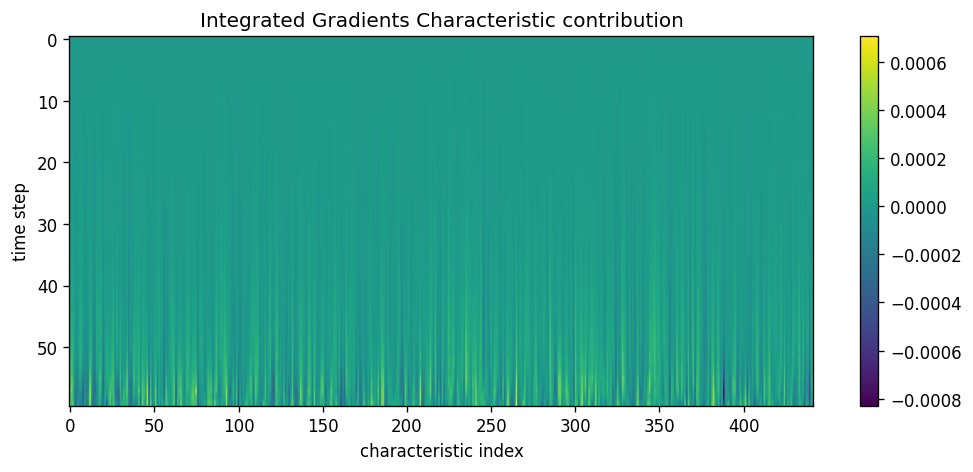

In [17]:
from captum.attr import IntegratedGradients

sample_input, _ = val_dataset[0]
sample_input = sample_input.unsqueeze(0).to(device) 

ig = IntegratedGradients(model)
attributions, delta = ig.attribute(sample_input, target=0, return_convergence_delta=True)
attributions = attributions.cpu().detach().numpy().squeeze()
plt.figure(figsize=(10, 4))
plt.imshow(attributions, aspect="auto", cmap="viridis")
plt.colorbar()
plt.xlabel("characteristic index")
plt.ylabel("time step")
plt.title("Integrated Gradients Characteristic contribution")
plt.show()


**Image Description**

Horizontal axis (characteristic index): represents the index number of the feature, 440+ features in total.

Vertical axis (time step): represents each time point in the input time window (60 steps in total).

Colour intensity: indicates the contribution of the feature to the model prediction at that point in time:

Yellow: positive high contribution
    
Green/blue: medium or small contribution
    
Purple: negative or no contribution

Based on the visualisation results, we can draw the following conclusions:

By looking at the heat map, the following interpretations can be made:

1. Later time windows are more critical

The colours are more active near the bottom of the graph (later time steps), indicating that the model is more focused on recent information. This is in line with the common sense of time series forecasting: the more recent the point in time, the more important it is for future forecasting.

2. Few features dominate the forecast

Only some of the feature dimensions show distinct colours in the heatmap, suggesting that the model does not make use of all features equally, but automatically focuses on the more relevant inputs.

3. Overall contribution is small but well distributed

The contribution values are mainly concentrated in the range of [-0.0008, 0.0006]. Although the values are small, there is a certain pattern in the time and feature dimensions, indicating that the model has interpretability.


In [6]:
!git init

# 3. 添加远程仓库（替换成你的 GitHub 仓库地址）
!git remote add origin https://github.com/ryan856666/Stock-Price-Prediction-with-LSTM

# 4. 把所有文件加入暂存区
!git add .

# 5. 提交
!git commit -m "Initial commit: add project structure and README"

# 6. 推送到 GitHub（如果远程分支是 main，用 main；若是 master，则替换为 master）
# 重命名当前分支为 main
!git branch -M main
# 再次推送，并设置上游为 origin/main
!git push -u origin main



已重新初始化已存在的 Git 仓库于 /Users/ryan/deep_learning/.git/
错误：远程 origin 已经存在。
[master 24ef699] Initial commit: add project structure and README
 1 file changed, 7 insertions(+), 51 deletions(-)
Username for 'https://github.com': ^C


In [7]:
# 显示当前工作目录
%pwd

# 列出目录下的文件
%ls


D2L_Lab_Report-2.ipynb           dl_coursework.ipynb
D2L_Lab_Report-3.ipynb           final.ipynb
D2L_Lab_Report.ipynb             final_download.ipynb
D2L_Lab_Report_my_version.ipynb  notebook5d33c89f01.ipynb
Untitled.ipynb                   sample_submission.csv
coursework.ipynb                 train.csv
coursework7.ipynb
